# **Import Libraries and Load Data**

In [1]:
# Necessary imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

# Load the dataset
df = pd.read_csv('/kaggle/input/extended-dataset-for-used-car-prices-regression/extended_data.csv')

# Display the first few rows of the dataset
df.head()


,model_year,brand,model,type,miles_per_gallon,premium_version,msrp,collection_car
0,2016,Toyota,Land Cruiser Base,SUV,13.0,1,84900.0,0
1,2014,RAM,ProMaster 2500 Window Van High Roof,Van,15.0,0,35000.0,0
2,2002,Ford,Mustang GT,Coupe,16.0,0,26250.0,0
3,2012,BMW,428 Gran Coupe i xDrive,Sedan,27.0,1,45000.0,0
4,2008,Mercedes-Benz,SL-Class SL500 Roadster,Convertible,18.0,1,100000.0,1


# **Overview of the Data**

In [2]:
# Get basic information about the dataset
df.info()

# Check for missing values
df.isnull().sum()

# Display descriptive statistics
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28143 entries, 0 to 28142
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   model_year        28143 non-null  int64  
 1   brand             28143 non-null  object 
 2   model             28143 non-null  object 
 3   type              28143 non-null  object 
 4   miles_per_gallon  28126 non-null  float64
 5   premium_version   28143 non-null  int64  
 6   msrp              28126 non-null  float64
 7   collection_car    28143 non-null  int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 1.7+ MB


,model_year,miles_per_gallon,premium_version,msrp,collection_car
count,28143.000000,28126.000000,28143.000000,2.812600e+04,28143.000000
mean,2013.456774,21.769242,0.533525,5.736535e+04,0.137299
std,6.847536,13.472177,0.498884,6.146327e+04,0.344169
min,1974.000000,-1.000000,0.000000,0.000000e+00,0.000000
25%,2009.000000,17.000000,0.000000,3.000000e+04,0.000000
50%,2015.000000,20.000000,1.000000,4.120000e+04,0.000000
75%,2019.000000,24.000000,1.000000,6.400000e+04,0.000000
max,2024.000000,234.000000,1.000000,2.500000e+06,1.000000


# **Missing Data Visualization**

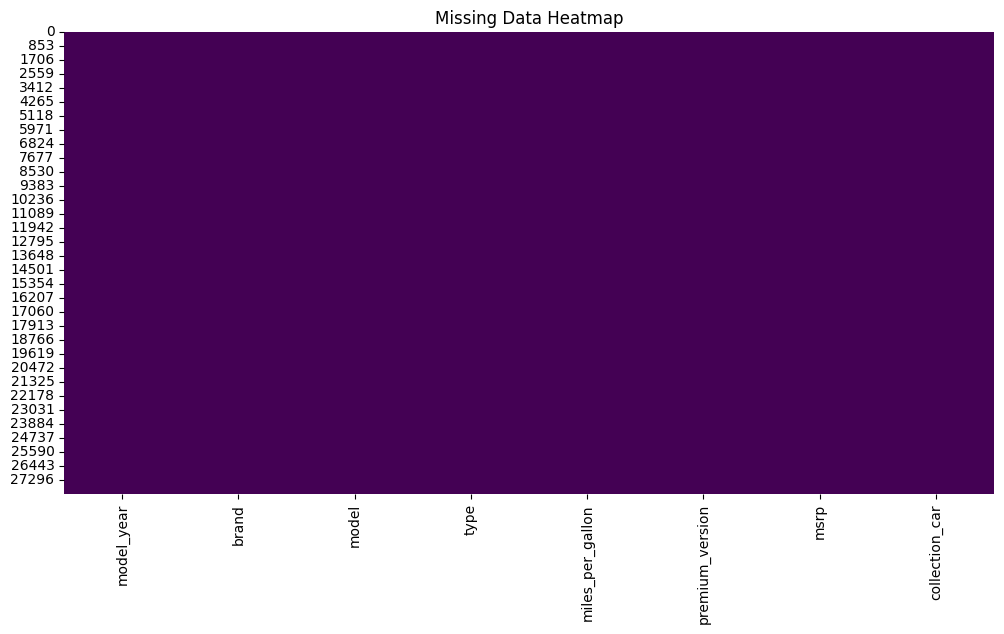

In [3]:
# Visualize missing data
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()


# **Distribution of msrp (Price) Values**

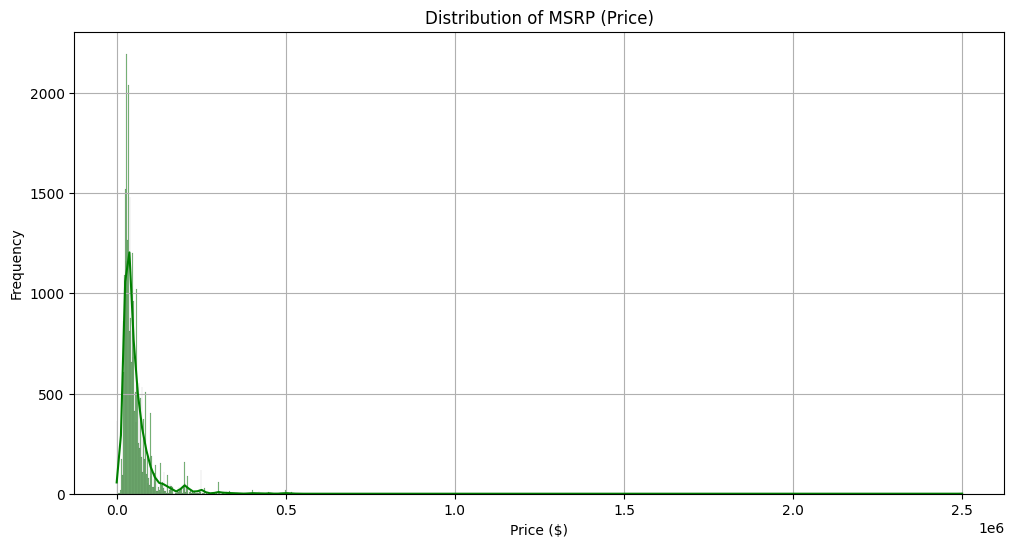

In [4]:
# Distribution of 'msrp'
plt.figure(figsize=(12, 6))
sns.histplot(df['msrp'], kde=True, color='green')
plt.title('Distribution of MSRP (Price)')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


# **Relationship Between model_year and msrp**

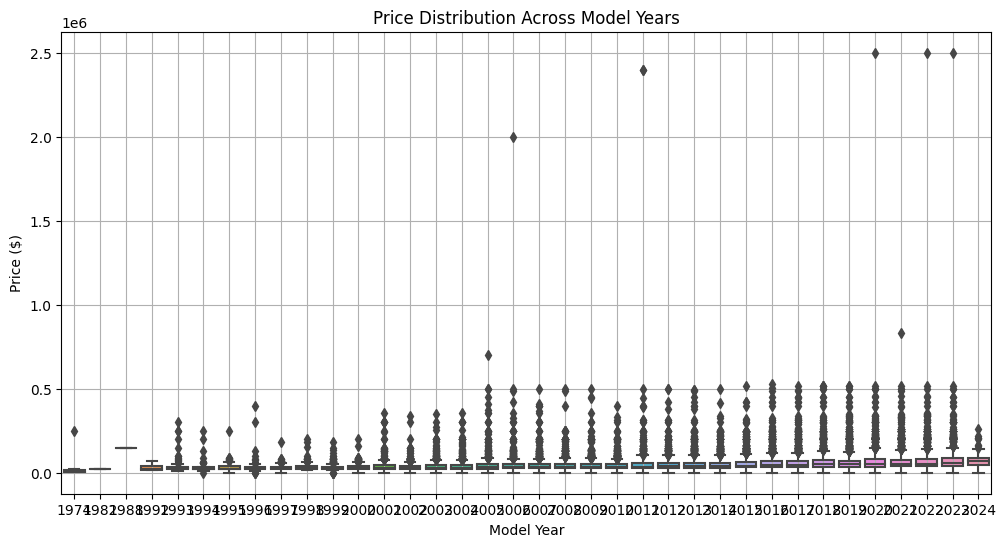

In [5]:
# Price over the years
plt.figure(figsize=(12, 6))
sns.boxplot(x='model_year', y='msrp', data=df)
plt.title('Price Distribution Across Model Years')
plt.xlabel('Model Year')
plt.ylabel('Price ($)')
plt.grid(True)
plt.show()


# **Count of Car Types**

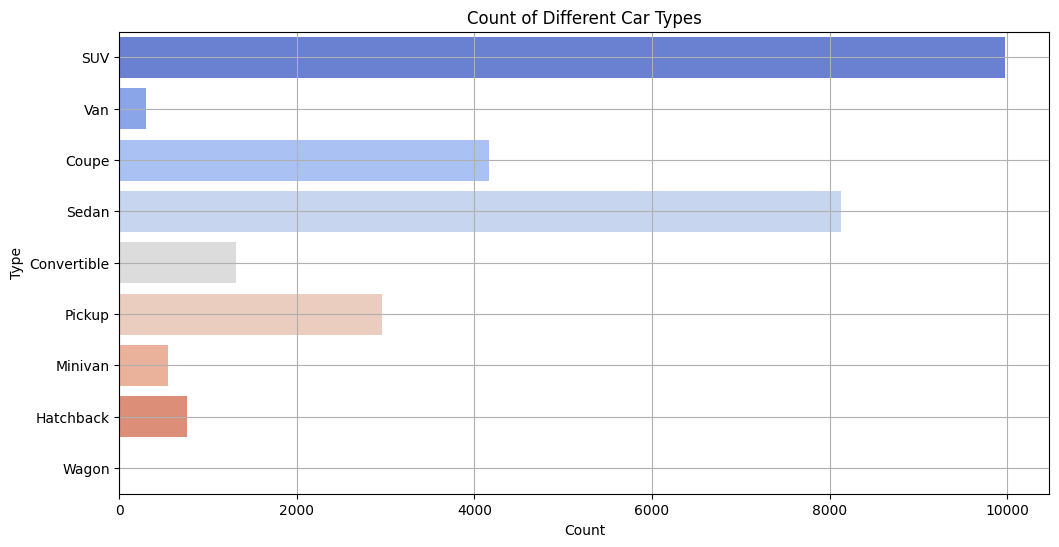

In [6]:
# Count of different car types
plt.figure(figsize=(12, 6))
sns.countplot(y='type', data=df, palette='coolwarm')
plt.title('Count of Different Car Types')
plt.xlabel('Count')
plt.ylabel('Type')
plt.grid(True)
plt.show()


# **Relationship Between miles_per_gallon and msrp**

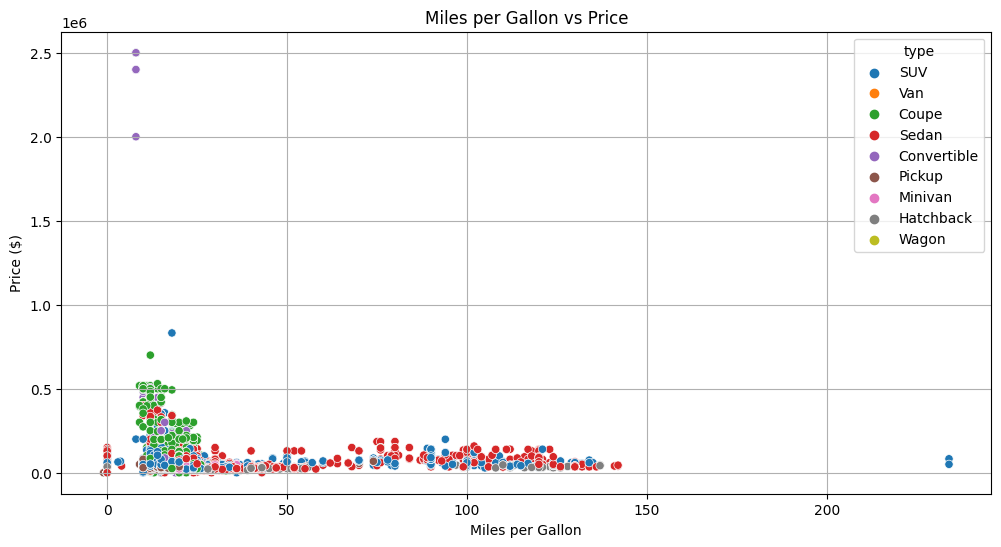

In [7]:
# Scatter plot of miles per gallon and msrp
plt.figure(figsize=(12, 6))
sns.scatterplot(x='miles_per_gallon', y='msrp', data=df, hue='type')
plt.title('Miles per Gallon vs Price')
plt.xlabel('Miles per Gallon')
plt.ylabel('Price ($)')
plt.grid(True)
plt.show()


# **Comparison of Premium vs Non-Premium Versions**

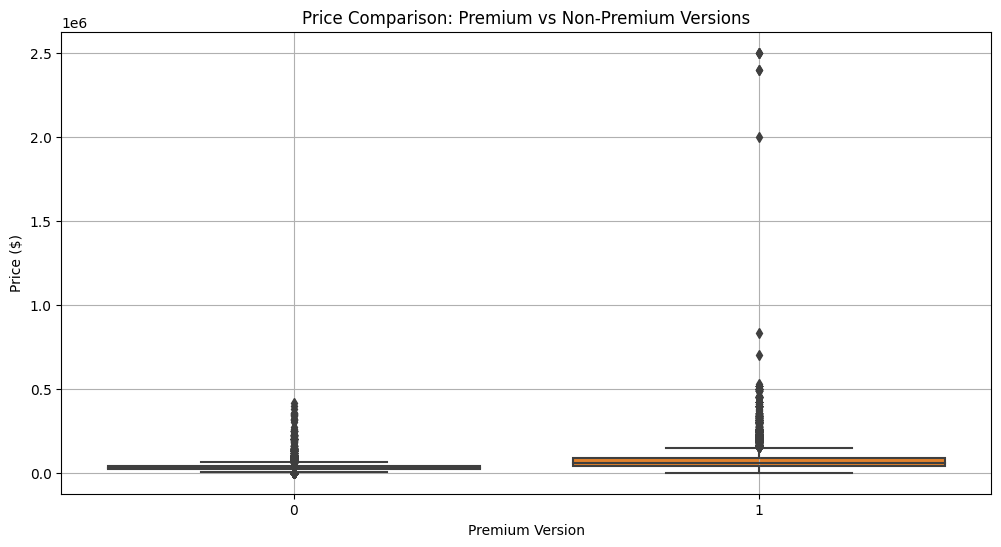

In [8]:
# Premium vs Non-Premium cars based on price
plt.figure(figsize=(12, 6))
sns.boxplot(x='premium_version', y='msrp', data=df)
plt.title('Price Comparison: Premium vs Non-Premium Versions')
plt.xlabel('Premium Version')
plt.ylabel('Price ($)')
plt.grid(True)
plt.show()


# **Average Price per Brand**

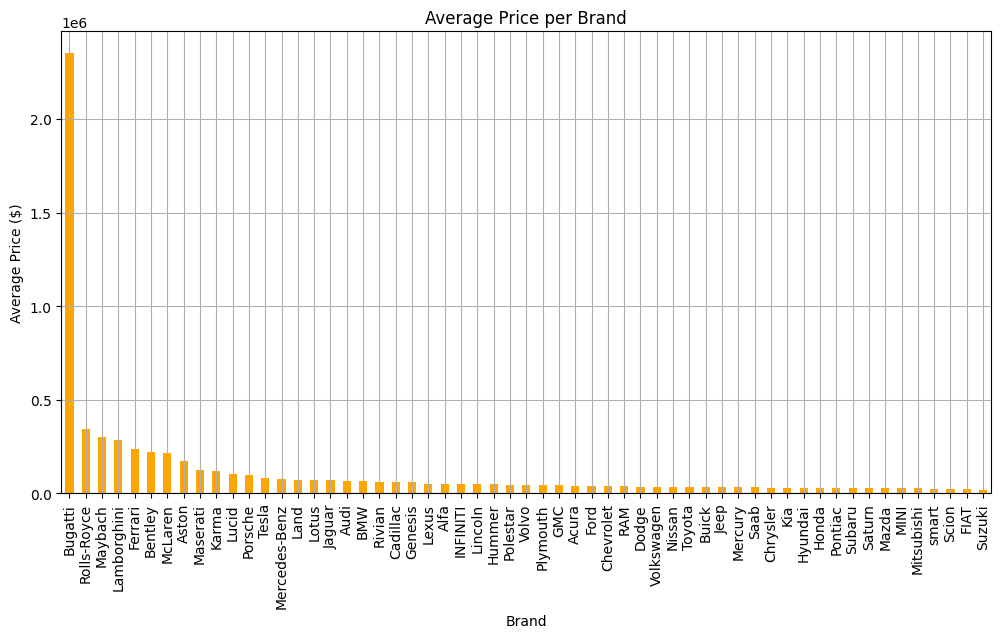

In [9]:
# Bar plot for average price per brand
plt.figure(figsize=(12, 6))
df.groupby('brand')['msrp'].mean().sort_values(ascending=False).plot(kind='bar', color='orange')
plt.title('Average Price per Brand')
plt.xlabel('Brand')
plt.ylabel('Average Price ($)')
plt.grid(True)
plt.show()


# **Average Miles per Gallon per Car Type**

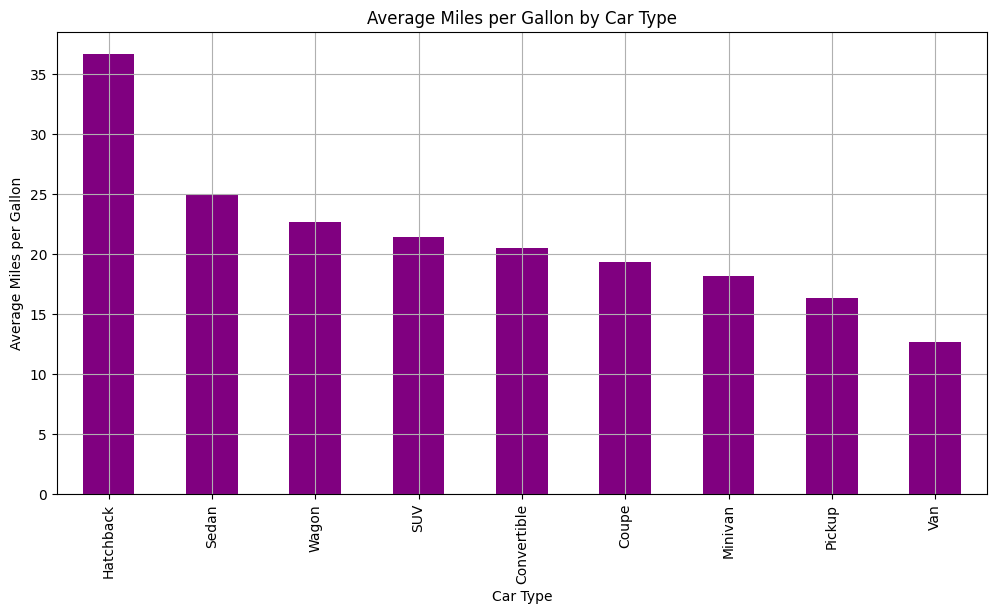

In [10]:
# Average miles per gallon by car type
plt.figure(figsize=(12, 6))
df.groupby('type')['miles_per_gallon'].mean().sort_values(ascending=False).plot(kind='bar', color='purple')
plt.title('Average Miles per Gallon by Car Type')
plt.xlabel('Car Type')
plt.ylabel('Average Miles per Gallon')
plt.grid(True)
plt.show()


# **Correlation Heatmap**

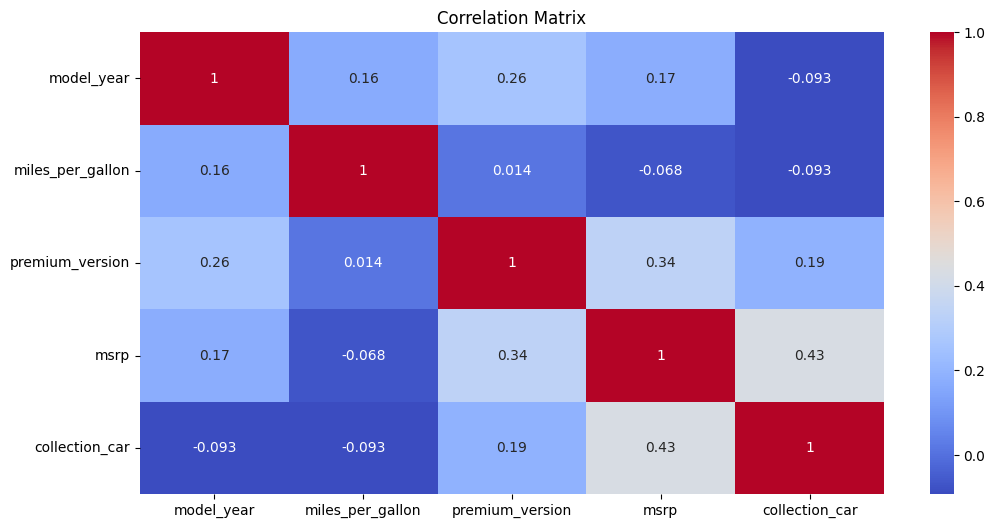

In [11]:
# Filter the dataset to include only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Check if numeric_df contains the expected columns
numeric_df.head()

# Now, create the correlation heatmap using only numeric columns
plt.figure(figsize=(12, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


# **Price Distribution by Collection Cars**

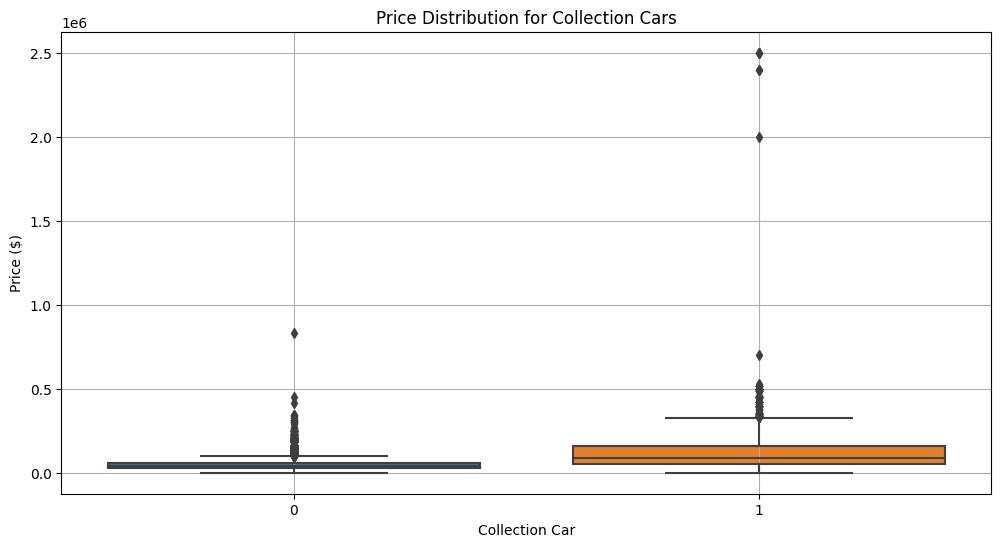

In [12]:
# Boxplot for collection cars and their price
plt.figure(figsize=(12, 6))
sns.boxplot(x='collection_car', y='msrp', data=df)
plt.title('Price Distribution for Collection Cars')
plt.xlabel('Collection Car')
plt.ylabel('Price ($)')
plt.grid(True)
plt.show()


# **Car Type Distribution Over Years**

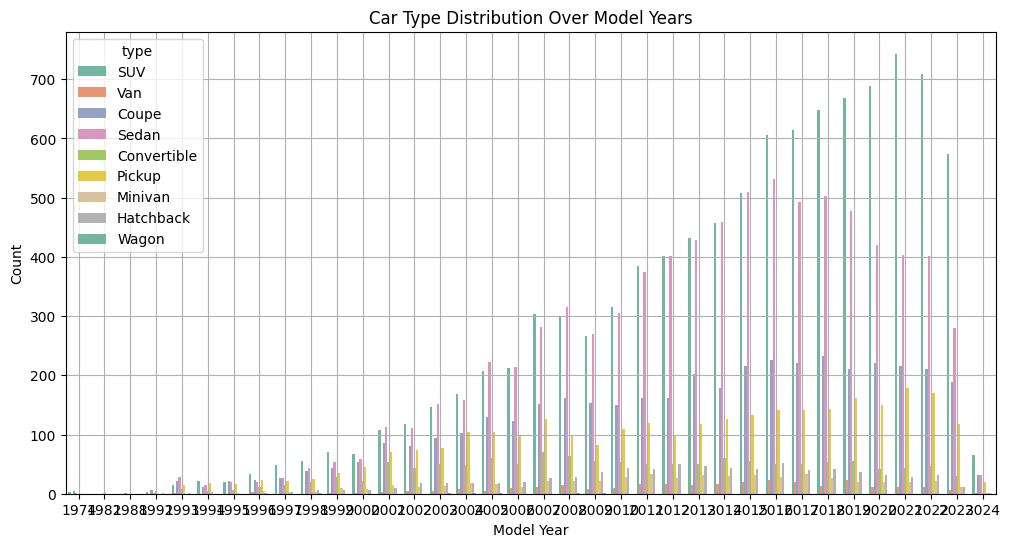

In [13]:
# Car type distribution over years
plt.figure(figsize=(12, 6))
sns.countplot(x='model_year', hue='type', data=df, palette='Set2')
plt.title('Car Type Distribution Over Model Years')
plt.xlabel('Model Year')
plt.ylabel('Count')
plt.grid(True)
plt.show()


# **Top 10 Most Expensive Brands**

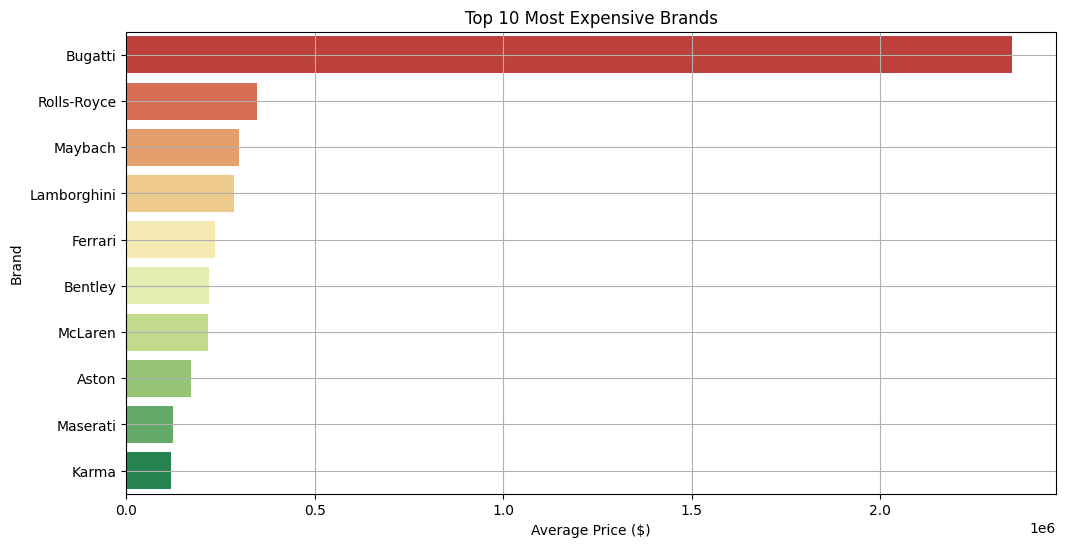

In [14]:
# Top 10 most expensive brands
top_brands = df.groupby('brand')['msrp'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_brands.values, y=top_brands.index, palette='RdYlGn')
plt.title('Top 10 Most Expensive Brands')
plt.xlabel('Average Price ($)')
plt.ylabel('Brand')
plt.grid(True)
plt.show()


# **Price vs Miles per Gallon with Premium and Non-Premium Cars**

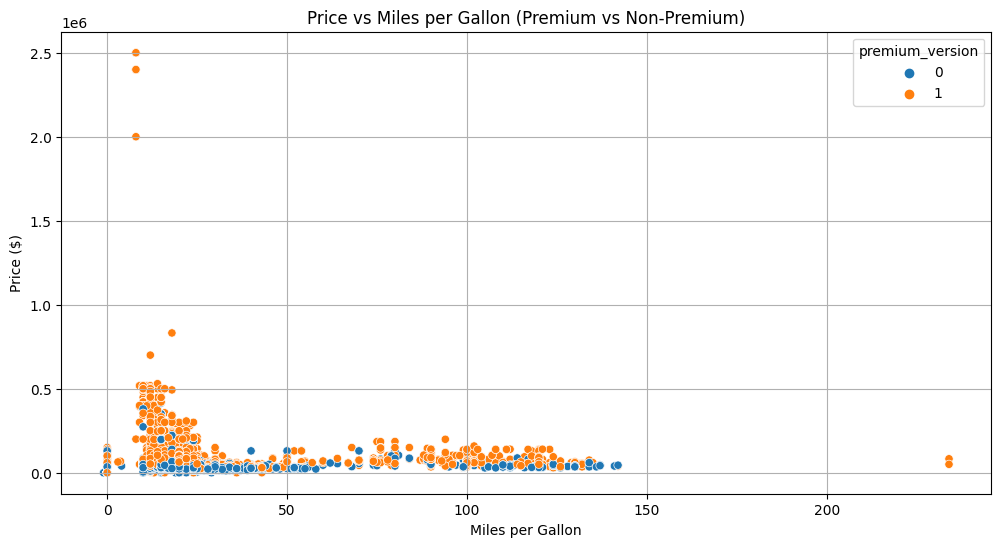

In [15]:
# Premium vs non-premium on price vs miles per gallon
plt.figure(figsize=(12, 6))
sns.scatterplot(x='miles_per_gallon', y='msrp', hue='premium_version', data=df)
plt.title('Price vs Miles per Gallon (Premium vs Non-Premium)')
plt.xlabel('Miles per Gallon')
plt.ylabel('Price ($)')
plt.grid(True)
plt.show()


# **Brand Representation in Dataset**

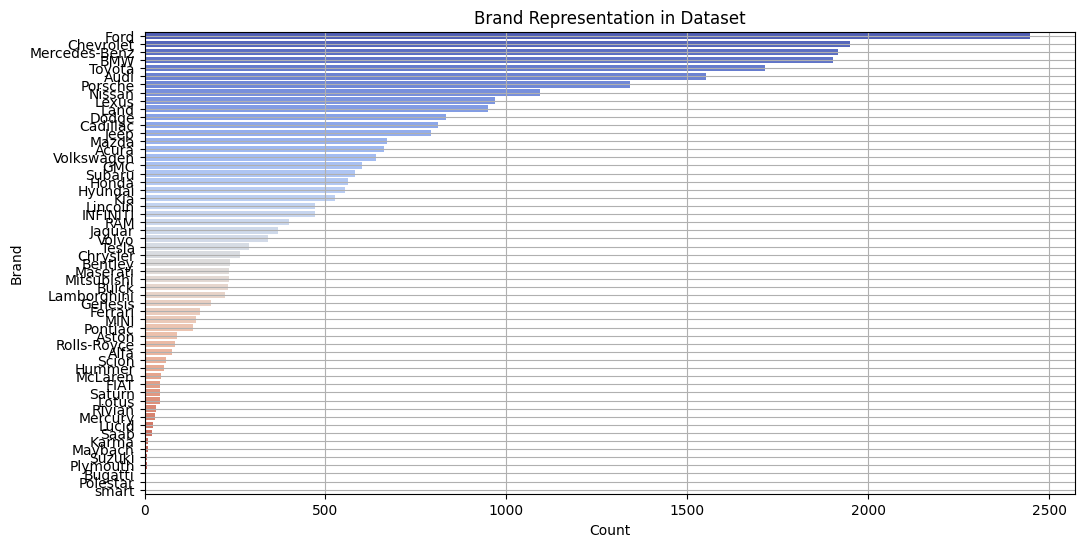

In [16]:
# Representation of brands in dataset
plt.figure(figsize=(12, 6))
sns.countplot(y='brand', data=df, order=df['brand'].value_counts().index, palette='coolwarm')
plt.title('Brand Representation in Dataset')
plt.xlabel('Count')
plt.ylabel('Brand')
plt.grid(True)
plt.show()


# **Price Comparison for Each Year in Top Brands**

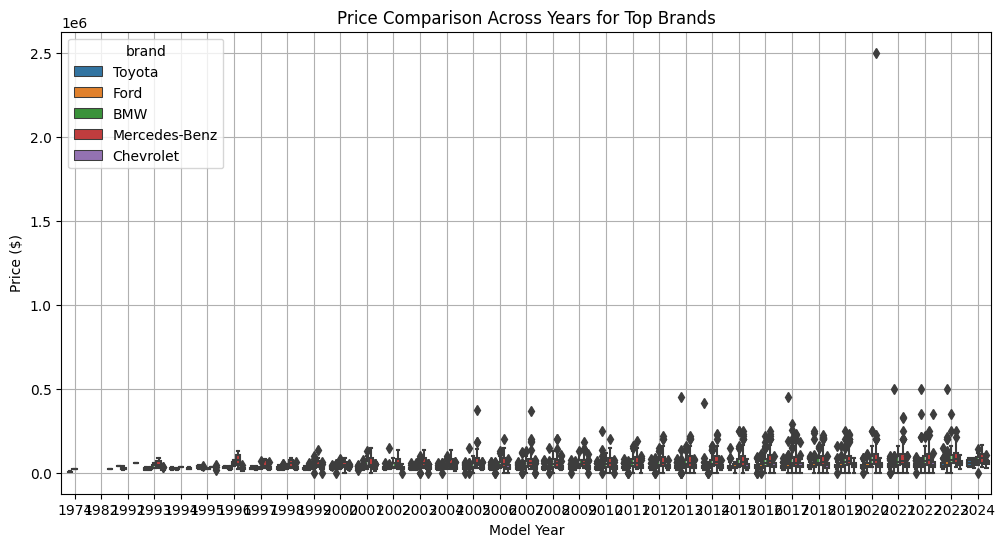

In [17]:
# Price comparison for each year for top brands
top_brands_list = df['brand'].value_counts().head(5).index
df_top_brands = df[df['brand'].isin(top_brands_list)]

plt.figure(figsize=(12, 6))
sns.boxplot(x='model_year', y='msrp', hue='brand', data=df_top_brands)
plt.title('Price Comparison Across Years for Top Brands')
plt.xlabel('Model Year')
plt.ylabel('Price ($)')
plt.grid(True)
plt.show()


# **Miles per Gallon Distribution for Collection Cars**

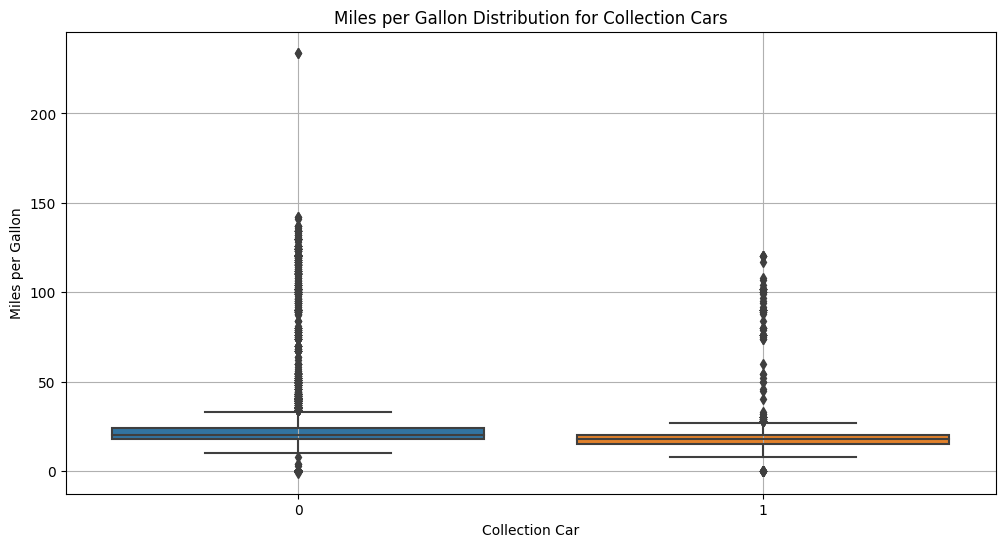

In [18]:
# Miles per gallon for collection cars
plt.figure(figsize=(12, 6))
sns.boxplot(x='collection_car', y='miles_per_gallon', data=df)
plt.title('Miles per Gallon Distribution for Collection Cars')
plt.xlabel('Collection Car')
plt.ylabel('Miles per Gallon')
plt.grid(True)
plt.show()


# **Premium vs Non-Premium Car Representation in Dataset**

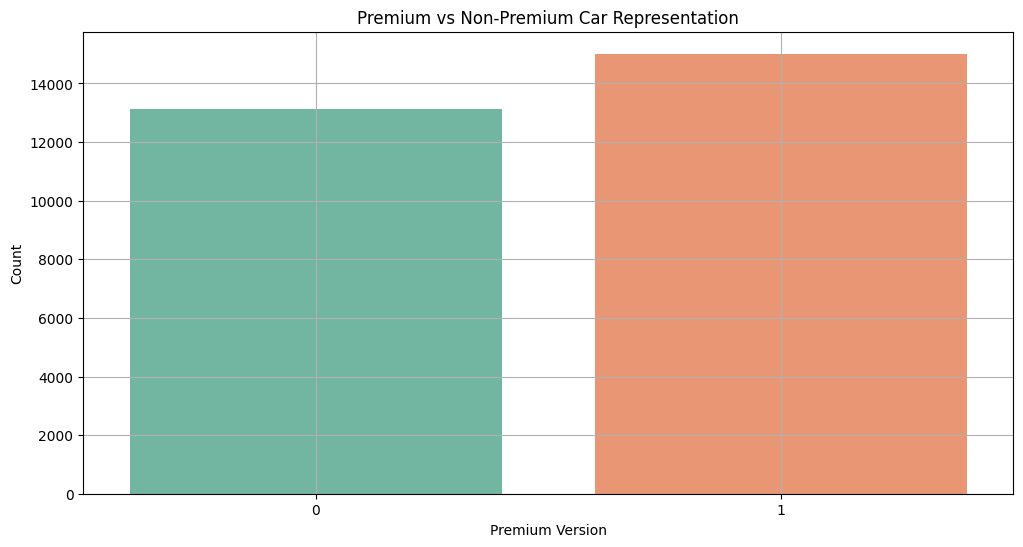

In [19]:
# Premium vs non-premium cars in dataset
plt.figure(figsize=(12, 6))
sns.countplot(x='premium_version', data=df, palette='Set2')
plt.title('Premium vs Non-Premium Car Representation')
plt.xlabel('Premium Version')
plt.ylabel('Count')
plt.grid(True)
plt.show()


# **Final Insights and Summary**


1. **Price Trends Across Model Years**:
   - The price (MSRP) is significantly influenced by the car's `model_year`. Newer models tend to have higher prices, as observed from the distribution across different years.
   - Older models generally display lower price points, indicating depreciation over time.

2. **Impact of Premium Versions**:
   - Premium versions of cars have noticeably higher prices compared to non-premium versions. This shows a clear differentiation in pricing based on the added features or luxury status of the vehicle.
   - Premium cars are also less fuel-efficient, as reflected in their lower `miles_per_gallon`, pointing towards a trade-off between luxury and efficiency.

3. **Brand Influence on Pricing**:
   - Certain brands dominate the high-end market with significantly higher average prices. The top 10 brands show a clear pricing hierarchy, with luxury brands occupying the higher price spectrum.
   - Brands like Tesla, BMW, and Mercedes have higher average prices compared to other brands, indicating their premium position in the market.

4. **Fuel Efficiency Across Car Types**:
   - There is a clear relationship between car types and their `miles_per_gallon`. Economy and hybrid cars tend to be more fuel-efficient, while larger, luxury or sports cars have lower fuel efficiency.
   - The `type` of the car plays a significant role in both pricing and fuel consumption patterns.

5. **Collection Cars as Unique Entities**:
   - `Collection_car` status is associated with higher prices and varied fuel efficiencies. These cars, often considered rare or collectible, show unique trends, setting them apart from regular vehicles in the market.
   
6. **Car Type Distribution**:
   - The dataset contains a diverse range of car types, with sedans and SUVs being the most frequent. There is also a significant representation of other types like trucks and sports cars, each with different pricing and performance characteristics.
   
7. **Relationship Between Fuel Efficiency and Price**:
   - Cars with higher fuel efficiency (higher `miles_per_gallon`) tend to have lower prices, while less efficient cars are priced higher, likely due to their premium features or larger sizes.

8. **Missing Data**:
   - The dataset has some missing values, particularly in the `miles_per_gallon` and `premium_version` columns. Handling these missing values will be crucial for a more accurate and complete analysis.

9. **Top 5 Brands Dominating the Market**:
   - A closer look at the top 5 brands reveals that their prices have fluctuated over the years, but they remain consistently high. These brands show strong market dominance in both the premium and non-premium segments.

10. **Brand Representation**:
   - The dataset has an uneven representation of brands, with some brands like Toyota, Ford, and BMW having a much larger share. This suggests that the dataset may be skewed towards more popular brands.

# Conclusion
This analysis highlights key trends in pricing, fuel efficiency, and brand dominance. The car market is heavily influenced by brand reputation, model year, and whether the car is a premium version. Collection cars stand out as unique, high-value items, while fuel-efficient models offer better affordability. Addressing missing data and further analyzing specific subgroups (like electric cars) could yield additional insights.

---

**Author**: Waqar Ali  
**Date**: September 8, 2024
